<a href="https://colab.research.google.com/github/dklpp/tf-developer/blob/main/Week4_Real_World_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

# Access the Data

In [2]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2023-11-01 19:25:21--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  21.6MB/s    in 7.7s    

2023-11-01 19:25:30 (18.6 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-11-01 19:25:30--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 142.251.10.207, 142.251.12.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  6.71MB/s    in 1.6s    

2023-11-01 19:25:32 (6.71 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [4]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

In [5]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [6]:
train_horse_dir

'./horse-or-human/horses'

In [7]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse50-3.png', 'horse09-6.png', 'horse11-1.png', 'horse08-0.png', 'horse12-1.png', 'horse20-7.png', 'horse27-7.png', 'horse36-3.png', 'horse40-2.png', 'horse37-4.png']
TRAIN SET HUMANS: ['human05-22.png', 'human15-24.png', 'human17-29.png', 'human14-10.png', 'human03-17.png', 'human09-11.png', 'human03-28.png', 'human17-30.png', 'human04-28.png', 'human11-22.png']
VAL SET HORSES: ['horse1-335.png', 'horse5-123.png', 'horse3-416.png', 'horse3-141.png', 'horse5-181.png', 'horse4-599.png', 'horse1-539.png', 'horse2-011.png', 'horse5-235.png', 'horse1-241.png']
VAL SET HUMANS: ['valhuman02-01.png', 'valhuman05-21.png', 'valhuman03-12.png', 'valhuman02-21.png', 'valhuman04-11.png', 'valhuman02-19.png', 'valhuman05-01.png', 'valhuman04-03.png', 'valhuman03-01.png', 'valhuman04-10.png']


In [8]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


# Get Look at the Data

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

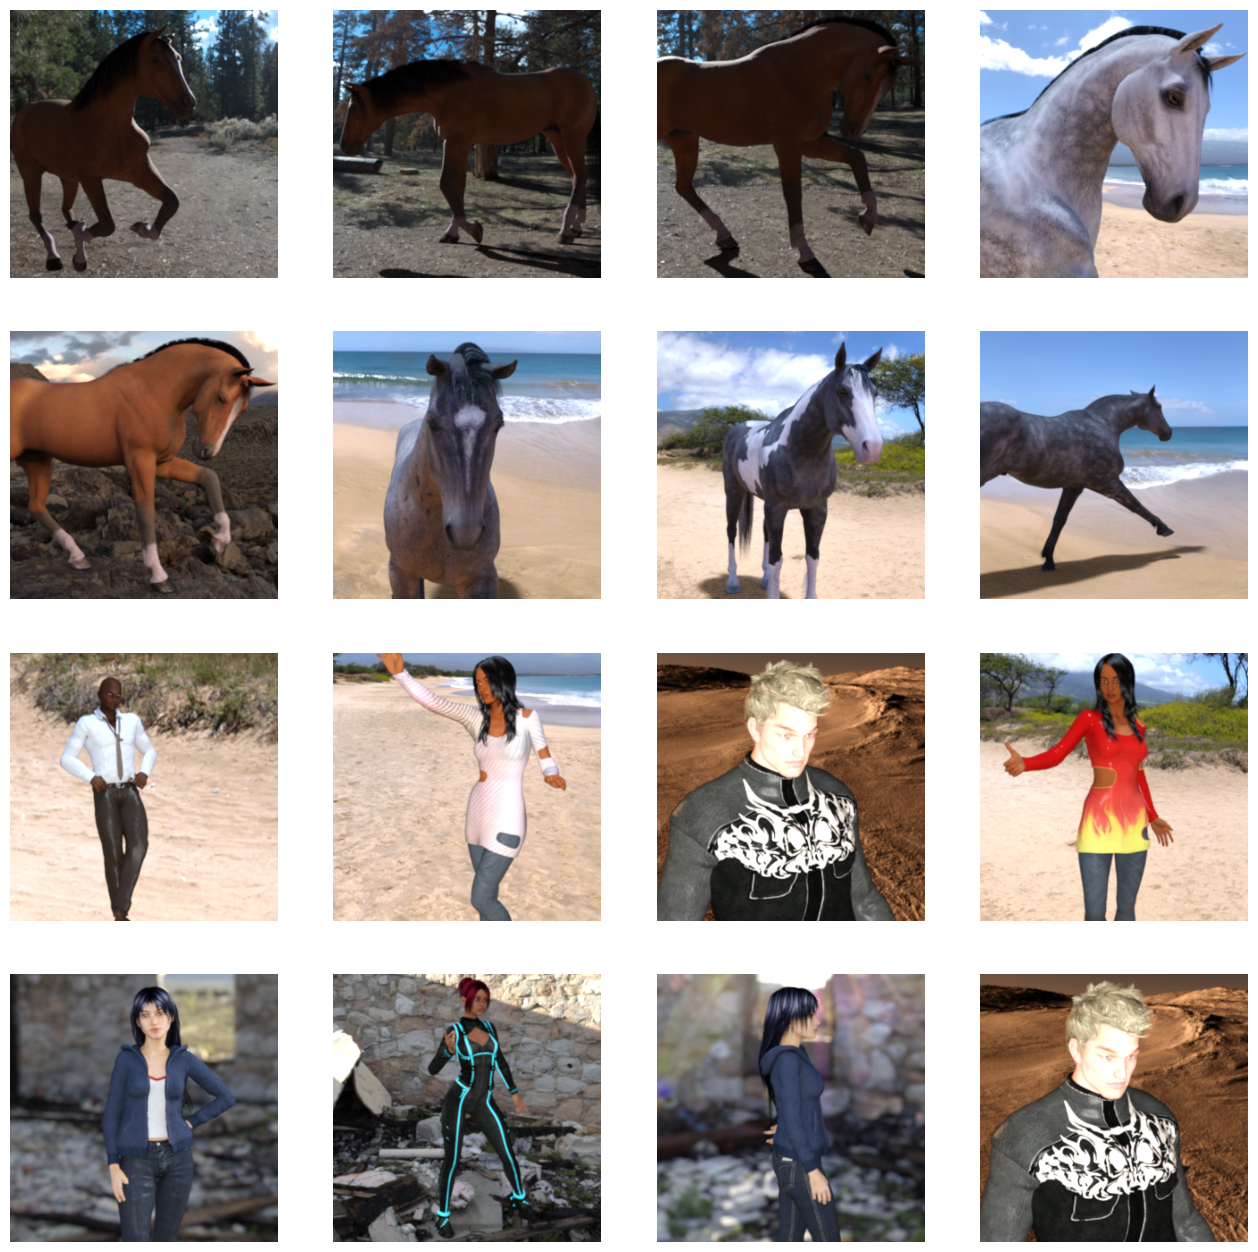

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Data Preprocessing

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255) # as well normalize the data 1./255

train_dir = './horse-or-human/'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(300,300), # resized automatically
    batch_size=128, # 1028 total, 8 batches
    class_mode='binary' # horses vs humans
)

Found 1027 images belonging to 2 classes.


In [12]:
validation_datagen = ImageDataGenerator(rescale = 1./255) # as well normalize the data 1./255

validation_dir = './validation-horse-or-human/'

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')

Found 256 images belonging to 2 classes.


# Define a Neural Network Architecture

In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary() # 78,400 in Flatten Layer, except 90,000 if we just input (300,300) image (also remember about RGB 3 channels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 149, 149, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 35, 35, 64)        0

In [15]:
# Compile setting

from tensorflow.keras.optimizers import RMSprop # allows to tweak the learning rate

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001),
              metrics=['accuracy']
             )

# Training

In [16]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  # 128 batch size (previously defined), 8 steps we need to load all images
      epochs=15,
      verbose=1, # display the info while training
      validation_data = validation_generator,
      validation_steps=8)  # 32 batch size, 8 steps we need to load 256 images

Epoch 1/15
8/8 [==============================] - 23s 1s/step - loss: 0.6903 - accuracy: 0.5695 - val_loss: 0.6658 - val_accuracy: 0.5781
Epoch 2/15
8/8 [==============================] - 12s 2s/step - loss: 0.6652 - accuracy: 0.6741 - val_loss: 0.6371 - val_accuracy: 0.5742
Epoch 3/15
8/8 [==============================] - 9s 1s/step - loss: 0.6194 - accuracy: 0.7519 - val_loss: 0.5666 - val_accuracy: 0.8594
Epoch 4/15
8/8 [==============================] - 9s 1s/step - loss: 0.5916 - accuracy: 0.7063 - val_loss: 0.5204 - val_accuracy: 0.8477
Epoch 5/15
8/8 [==============================] - 9s 1s/step - loss: 0.5179 - accuracy: 0.8621 - val_loss: 0.4861 - val_accuracy: 0.7930
Epoch 6/15
8/8 [==============================] - 9s 1s/step - loss: 0.4421 - accuracy: 0.8743 - val_loss: 0.3980 - val_accuracy: 0.8516
Epoch 7/15
8/8 [==============================] - 10s 1s/step - loss: 0.3944 - accuracy: 0.8699 - val_loss: 0.7550 - val_accuracy: 0.6562
Epoch 8/15
8/8 [======================

# Visualizing the Accuracy, Loss

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

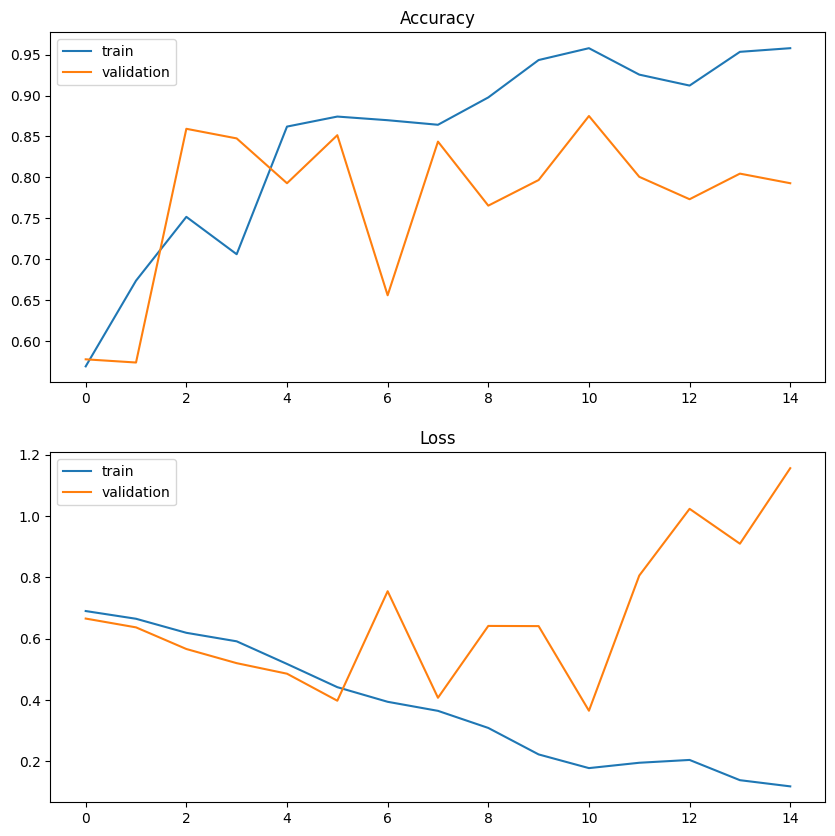

In [18]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

ax1.plot(train_accuracy, label='train')
ax1.plot(val_accuracy, label='validation')
ax1.set_title("Accuracy")

ax2.plot(train_loss, label='train')
ax2.plot(val_loss, label='validation')
ax2.set_title("Loss")

ax1.legend()
ax2.legend();

# Model Prediction
- use pixabay for easy download of images

In [19]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

KeyboardInterrupt: ignored

In [ ]:
# # CODE BLOCK FOR OLDER VERSIONS OF SAFARI

# import numpy as np
# from tensorflow.keras.utils import load_img, img_to_array
# import os

# images = os.listdir("/tmp/images")

# print(images)

# for i in images:
#  print()
#  # predicting images
#  path = '/tmp/images/' + i
#  img = load_img(path, target_size=(300, 300))
#  x = img_to_array(img)
#  x /= 255
#  x = np.expand_dims(x, axis=0)

#  images = np.vstack([x])
#  classes = model.predict(images, batch_size=10)
#  print(classes[0])
#  if classes[0]>0.5:
#    print(i + " is a human")
#  else:
#    print(i + " is a horse")

# Visualizing Intermediate Representations
- Look. What distinctiveness in the images is identified by a Convolutions?


1/1 [==============================] - 0s 309ms/step


<ipython-input-20-6a1089b7fa5c>:45: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


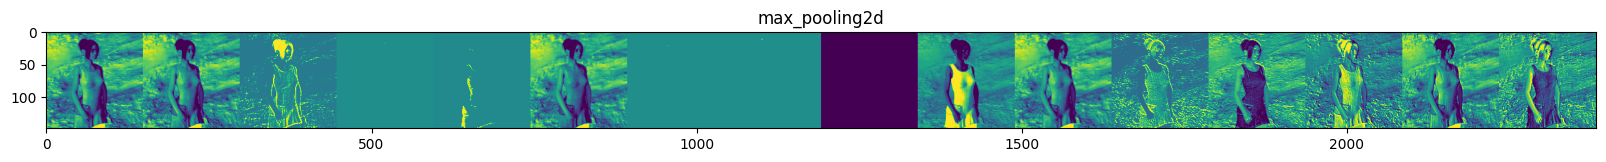

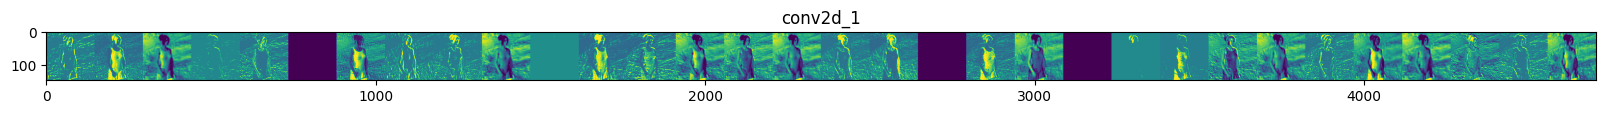

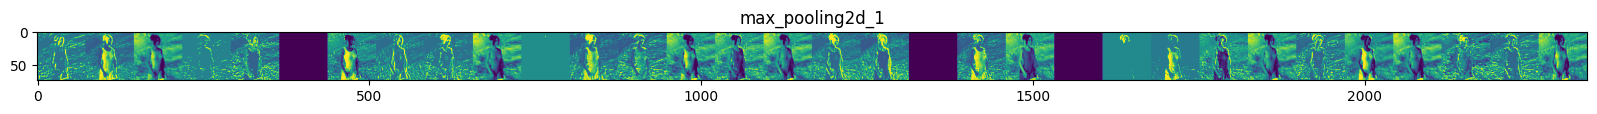

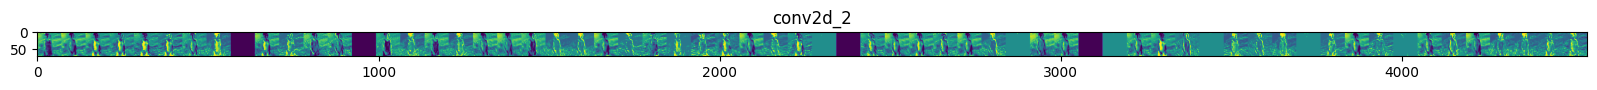

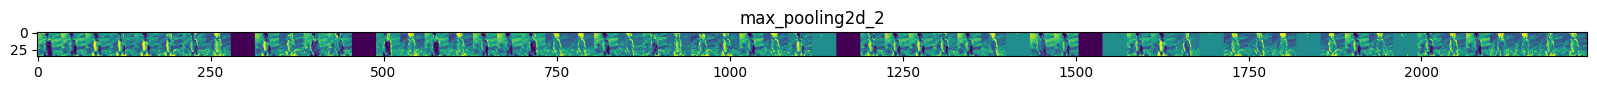

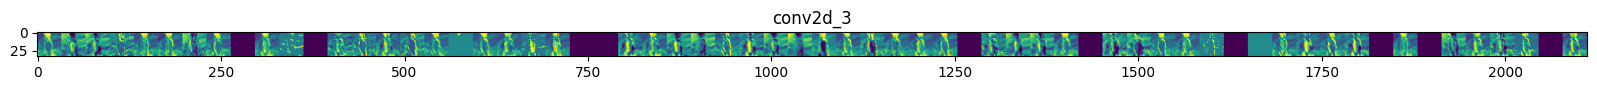

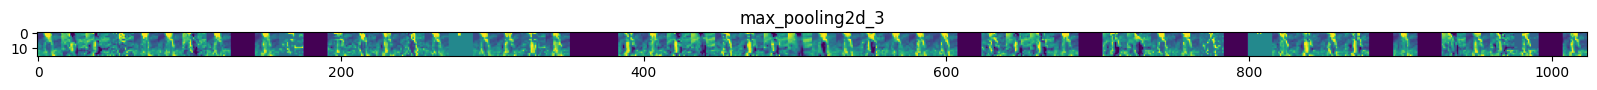

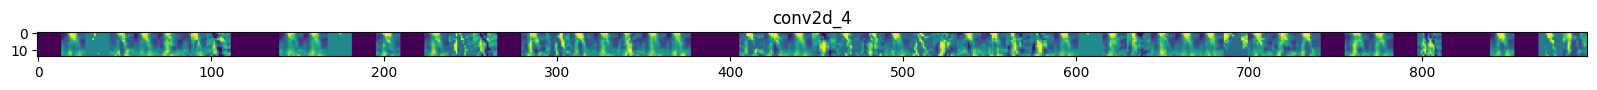

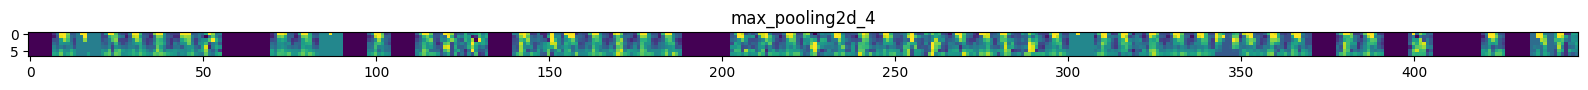

In [20]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# Clean Up the Kernel

In [ ]:
from google.colab import runtime
runtime.unassign()